In [1]:
import DatasetLoad
import numpy as np

# Load the dataset
Dataset_name = 'EuroSAT'
SPLIT = 'train'
path = "D:\Datasets"


loaded_dataset = DatasetLoad.dataset(Dataset_name, path ,SPLIT, shuffle = False)

print(loaded_dataset)





EuroSAT Dataset
    type: NonGeoDataset
    size: 16200


In [2]:
classes = DatasetLoad.get_classes(loaded_dataset)
classes

['AnnualCrop',
 'Forest',
 'HerbaceousVegetation',
 'Highway',
 'Industrial',
 'Pasture',
 'PermanentCrop',
 'Residential',
 'River',
 'SeaLake']

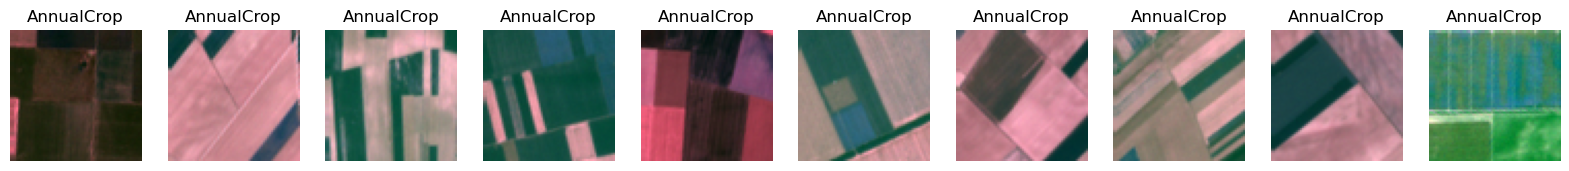

In [3]:
import matplotlib.pyplot as plt
import torch
# Create an iterator from the DataLoader
data_iter = iter(loaded_dataset)

fig, axs = plt.subplots(1, 10, figsize=(20, 10))

for i in range(10):
    # Get the next batch of data
    images = next(data_iter)['image']
    labels = next(data_iter)['label']
    # Select the first three channels of the image
    imager = images[ 3, :]
    imageb = images[ 2, :]
    imageg = images[ 1, :]
    # Stack the three channels together 
    image = torch.stack([imager, imageg, imageb], dim=0)

    # Normalize the image to the range [0, 1]
    image = (image - image.min()) / (image.max() - image.min())

    axs[i].imshow(image.permute(1, 2, 0))  # permute dimensions to (height, width, channels)
    axs[i].set_title(classes[labels.item()])
    axs[i].axis('off')

plt.show()

PermanentCrop


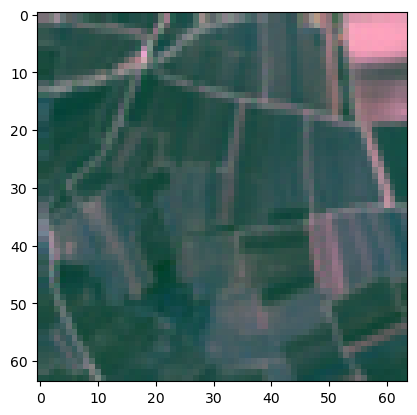

In [4]:
import matplotlib.pyplot as plt
import torch
import random

images = loaded_dataset[random.randint(1,len(loaded_dataset))]['image']
labels = loaded_dataset[random.randint(1,len(loaded_dataset))]['label']
# Select the first three channels of the image
imager = images[ 3, :]
imageb = images[ 2, :]
imageg = images[ 1, :]
# Stack the three channels together 
image = torch.stack([imager, imageg, imageb], dim=0)

# Normalize the image to the range [0, 1]
image = (image - image.min()) / (image.max() - image.min())

plt.imshow(image.permute(1, 2, 0))  # permute dimensions to (height, width, channels)
print(classes[labels.item()])


plt.show()

In [6]:
from train import train_one_epoch
from model import EncoderModel, DecoderModel, EntropyBottleneck
from torch import optim


USE_CUDA = True # change to True if you have a compatible GPU
RANDOM_SEED = 20230619
BATCH_SIZE = 100
EPOCHS = 3
beta = 0

torch.manual_seed(RANDOM_SEED)
device = torch.device("cuda" if USE_CUDA else "cpu")

encoder_model = EncoderModel(z_channels=2).to(device)
decoder_model = DecoderModel(z_channels=2).to(device)
entropy_bottleneck = EntropyBottleneck(z_channels=2).to(device)



optimizer = optim.Adam(
    list(encoder_model.parameters())
    + list(decoder_model.parameters())
    + list(entropy_bottleneck.parameters()),
    lr=0.00001)

train_one_epoch(EPOCHS, beta, loaded_dataset, encoder_model, decoder_model, entropy_bottleneck, optimizer)


Training epoch 3, batch   0 of 16200: BPP = inf; MSE = 1255124.6250; loss per pixel = nan;
  prior entropy (per pixel, per latent dim): nan, nan


Training epoch 3, batch  75 of 16200: BPP = nan; MSE = nan; loss per pixel = nan;
  prior entropy (per pixel, per latent dim): nan, nan
Training epoch 3, batch  150 of 16200: BPP = nan; MSE = nan; loss per pixel = nan;
  prior entropy (per pixel, per latent dim): nan, nan


KeyboardInterrupt: 